# Lets do object detection using YOLO

In [1]:
# Lets see GPU Details 
!nvidia-smi

Sat Jan 14 13:19:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Clone Darknet GitHub repository

In [2]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.15 MiB | 22.67 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.


In [3]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 21 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 

## Go to the darknet folder, enable GPU, then compile the entire thing

In [4]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1420:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

## Get the YOLO Weights file

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2023-01-14 13:22:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.9MB/s    in 12s     

2023-01-14 13:22:37 (19.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## To get the working Directory

In [6]:
!pwd

/content/darknet


## Install requirede libraries

In [7]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.5-4.2).
libvorbis-dev set to manually installed.
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
libdc1394-22 is already the newest version (2.2.5-1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2017~U7-8).
libtbb-dev set to manually installed.
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.9).
libtiff5-dev set to manually installed.
qtbase5-dev is already the newest version (5.9.5+dfsg-0ubuntu2.6).
qtbase5-dev set to manually installed.
unzip is already the newest version (6.0-21ubuntu1.2).
ffmpeg is already the newest version (7:3.4.11-0ubuntu

## Lets Apply our model to the traffice video and see the output

In [8]:
import cv2
! pip install pytube
from pytube import YouTube
from google.colab.patches import cv2_imshow
from IPython.display import YouTubeVideo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 5.0 MB/s eta 0:00:00


## Have A look at video we are working on

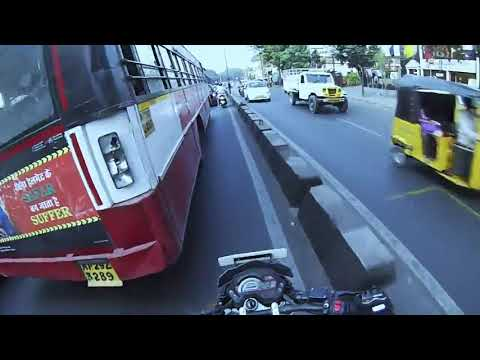

In [9]:
YouTubeVideo('NVMWAMqgT-Y',width="1000",height="500")



## Lets download the video and extract frames from it to process

In [10]:
video_address = 'https://www.youtube.com/watch?v=NVMWAMqgT-Y'
video = YouTube(video_address)
print(video.streams.all())
stream = video.streams[3]
stream.download()

<ipython-input-10-8920cb2c23ee>:3: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  print(video.streams.all())


[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400b" progressive="Fals

'/content/darknet/2 min of Indian driving in traffic.mp4'

In [13]:
mv '/content/darknet/2 min of Indian driving in traffic.mp4' '/content/darknet/driving_traffic.mp4'

## Lets apply yolo on the downloaded video

In [14]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show driving_traffic.mp4 -i 0 -out_filename output1.avi -thresh 0.7

Streaming output truncated to the last 5000 lines.
Objects:

truck: 76% 
car: 96% 
car: 87% 
person: 89% 

FPS:29.4 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

truck: 88% 
car: 77% 
person: 76% 
person: 71% 

FPS:29.7 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

truck: 73% 
car: 96% 
car: 75% 
person: 95% 

FPS:29.5 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

car: 96% 
car: 80% 
person: 90% 
person: 72% 

FPS:29.9 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

truck: 77% 
car: 93% 
car: 86% 
car: 79% 
person: 81% 

FPS:29.6 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

motorbike: 92% 
car: 94% 
person: 75% 

FPS:29.6 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

truck: 85% 
motorbike: 72% 
car: 95% 

FPS:29.8 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

truck: 77% 
truck: 76% 
truck: 72% 
car: 95% 
car: 72% 
person: 75% 
person: 74% 

FPS:29.3 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

car: 91% 
person: 86% 
person: 84% 

FPS:29.4 	 AVG_FPS:29.9

 cvWriteFrame 
Objects:

car: 98% 
person: 83% 

FPS:30.0 	 AVG_FPS:29.

## Lets apply yolo on the downloaded Image

In [20]:
!wget https://cdn.pixabay.com/photo/2019/09/04/13/48/team-4451672_960_720.jpg

--2023-01-14 13:37:37--  https://cdn.pixabay.com/photo/2019/09/04/13/48/team-4451672_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200613 (196K) [binary/octet-stream]
Saving to: ‘team-4451672_960_720.jpg’

team-4451672_960_72 100%[===================>] 195.91K  --.-KB/s    in 0.02s   

2023-01-14 13:37:37 (11.6 MB/s) - ‘team-4451672_960_720.jpg’ saved [200613/200613]



In [27]:
!pwd

/content/darknet


In [28]:
!./darknet detect cfg/yolov3.cfg yolov3.weights team-4451672_960_720.jpg

 CUDA-version: 11020 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

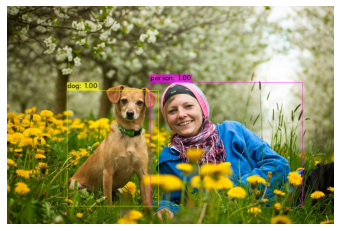

In [29]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)